<a href="https://colab.research.google.com/github/diego-ciciani01/final-project-FDS/blob/main/pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
%cd /content/drive/MyDrive/Colab Notebooks/università/FDS/final-test/stroke/report

/content/drive/MyDrive/Colab Notebooks/università/FDS/final-test/stroke/report


# Libraries

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from matplotlib.legend_handler import HandlerLine2D


<ipython-input-51-8c6686b28197>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Pre-processing Dataframe

In [4]:
# Get the dataset

dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/università/FDS/final-test/stroke/healthcare-dataset-stroke-data.csv")

In [5]:
# Inspect the dataset
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Replaces the missing values in the 'bmi' column with the mean of the available values
dataset.bmi.fillna(dataset.bmi.mean(), inplace=True)

In [7]:
# RUN ONLY ONE TIME
run = True
if(run):
  # It removes the single row where the 'gender' column has the value 'Other'
  dataset.drop(dataset.loc[dataset['gender'] =='Other'].index, inplace=True)

  # GENDER: F/M --> 1/0
  dataset["gender"] = dataset["gender"].apply(lambda x: 1 if x=="Female" else 0)

  # EVER_MARRIED: YES/NO --> 1/0
  dataset["ever_married"] = dataset["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

  # RESIDENCE_TYPE: URBAN/RURAL --> 1/0
  dataset["Residence_type"] = dataset["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)

dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,44873,1,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,19723,1,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,37544,0,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


In [8]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,44873,1,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,19723,1,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,37544,0,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


In [9]:
# Standardization on the columns age, avg_glucose_level, and bmi   ???????????????????????????
df_norm = dataset.copy()

std = StandardScaler()
cols = ['age','avg_glucose_level', 'bmi']
norm = std.fit_transform(df_norm[cols])

df_norm[cols] = pd.DataFrame(norm)

df_norm = df_norm.drop(df_norm.index[-1])



df_norm

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,1.051242,0,1,1,Private,1,2.706450,1.001041,formerly smoked,1
1,51676,1,0.785889,0,0,1,Self-employed,0,2.121652,-0.000165,never smoked,1
2,31112,0,1.626174,0,1,1,Private,0,-0.004867,0.468399,never smoked,1
3,60182,1,0.255182,0,0,1,Private,1,1.437473,0.715233,smokes,1
4,1665,1,1.581949,1,0,1,Self-employed,0,1.501297,-0.635858,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,1.626174,0,0,0,children,0,-0.494481,-0.000165,Unknown,0
5105,18234,1,1.670400,1,0,1,Private,1,0.420922,1.442744,never smoked,0
5106,44873,1,-0.363976,0,0,1,Self-employed,1,-0.511266,0.221565,never smoked,0
5107,19723,1,0.343633,0,0,1,Self-employed,0,1.328375,-0.427998,never smoked,0


# Descriptive analysis

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 647.9+ KB


In [11]:
dataset.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [12]:
df = dataset.copy()

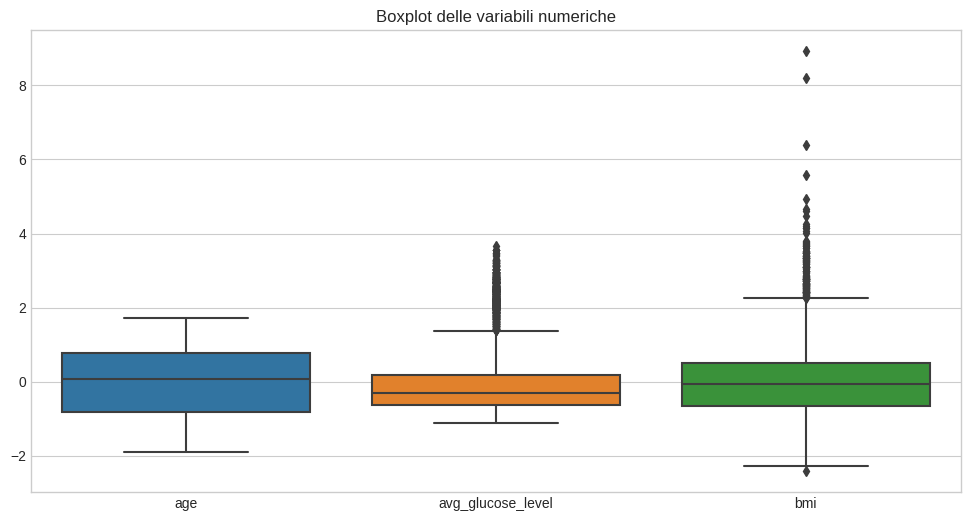

In [13]:
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
df_norm[numeric_columns].describe().transpose()

#Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_norm[numeric_columns])
plt.title('Boxplot delle variabili numeriche')
plt.show()

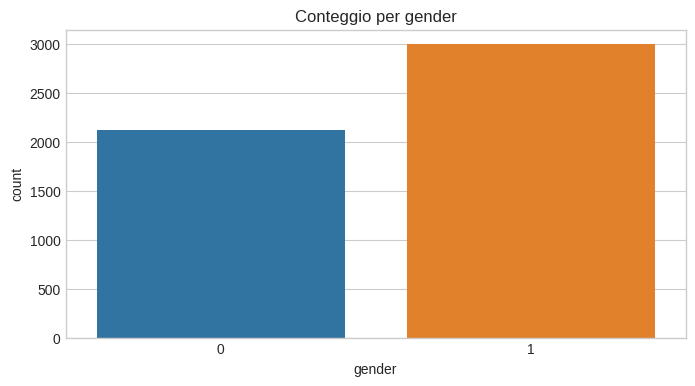

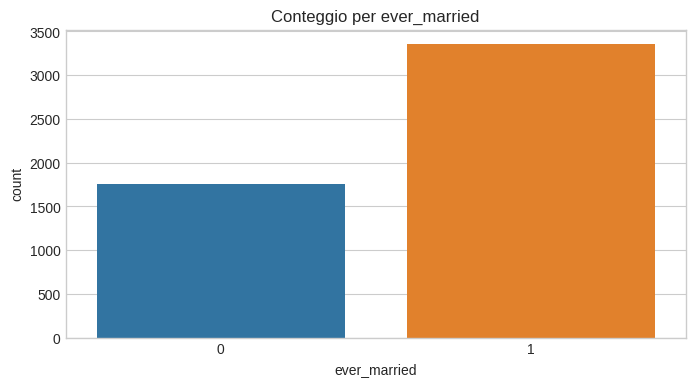

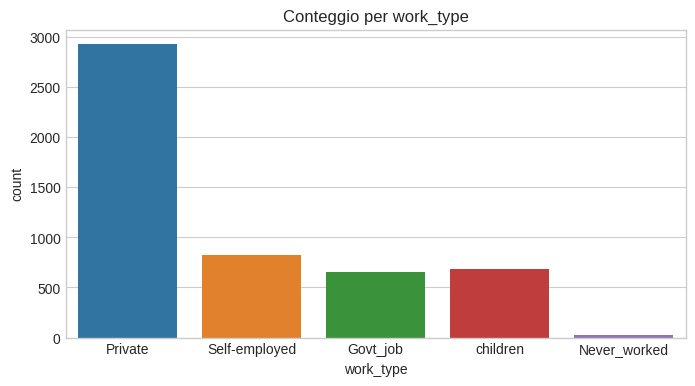

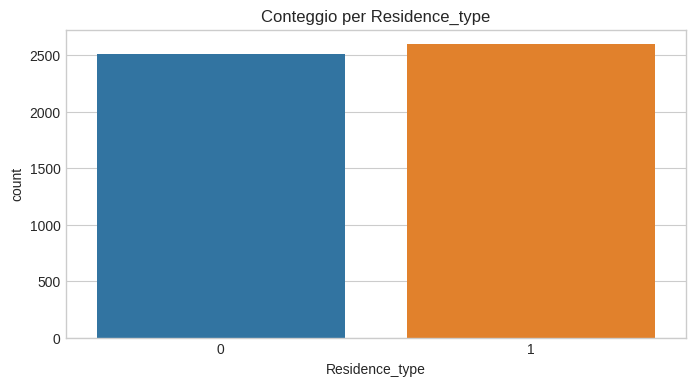

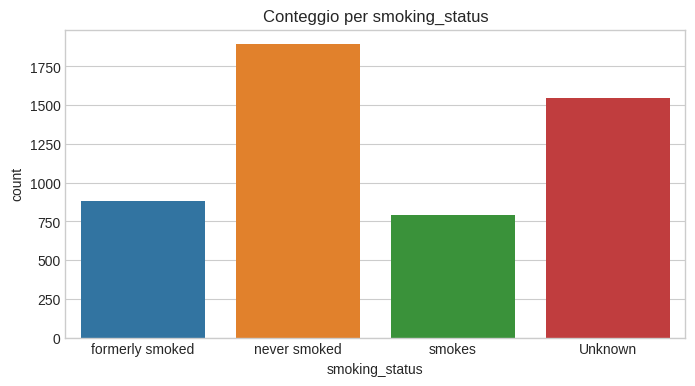

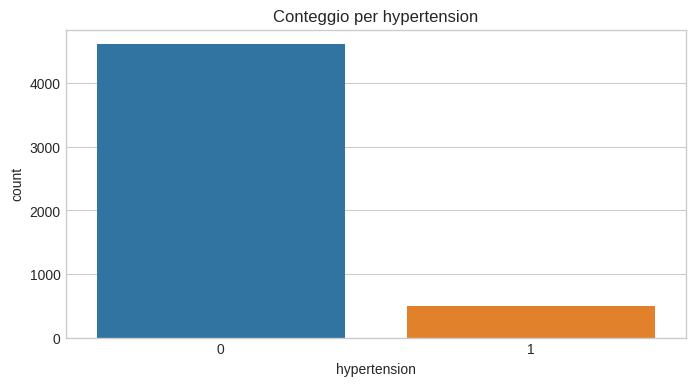

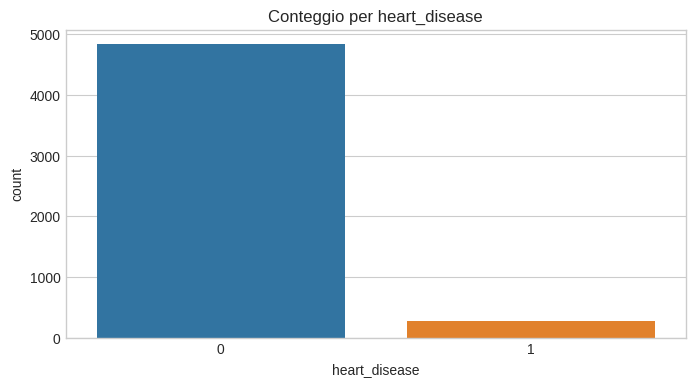

In [14]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','hypertension', 'heart_disease']
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'Conteggio per {column}')
    plt.show()

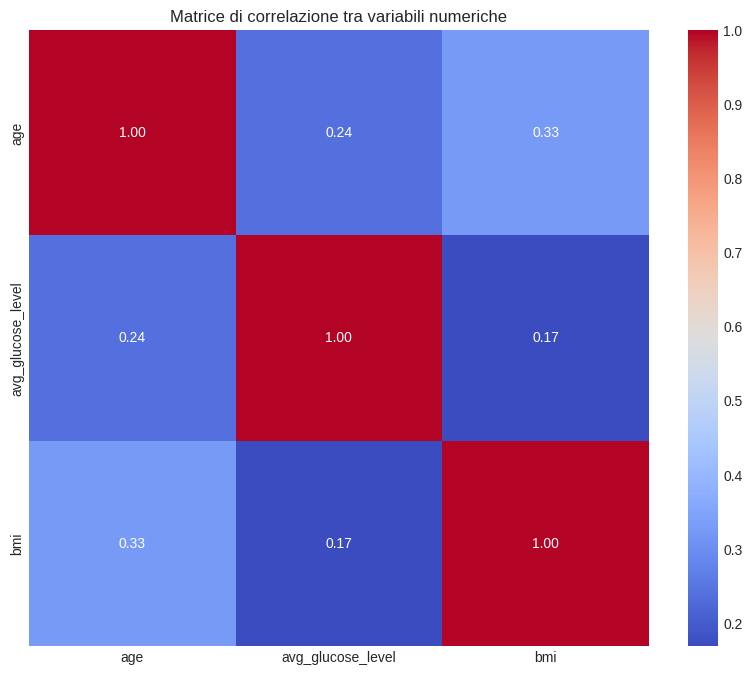

In [15]:
#Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione tra variabili numeriche')
plt.show()

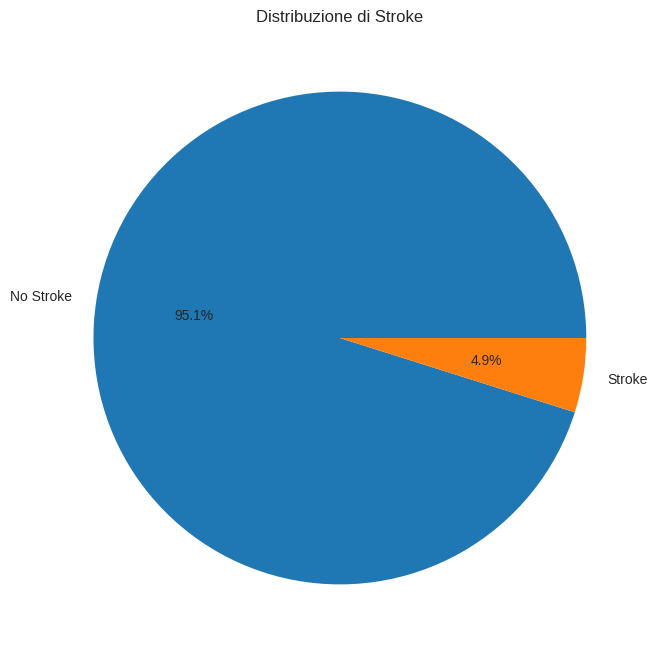

In [16]:
plt.figure(figsize=(8, 8))
df['stroke_label'] = df['stroke'].map({1: 'Stroke', 0: 'No Stroke'})
stroke_distribution = df['stroke_label'].value_counts()
plt.pie(stroke_distribution, labels=stroke_distribution.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
plt.title('Distribuzione di Stroke')
plt.show()


<Figure size 1000x600 with 0 Axes>

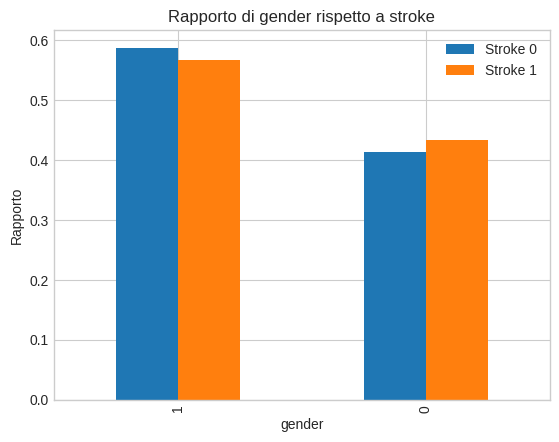

<Figure size 1000x600 with 0 Axes>

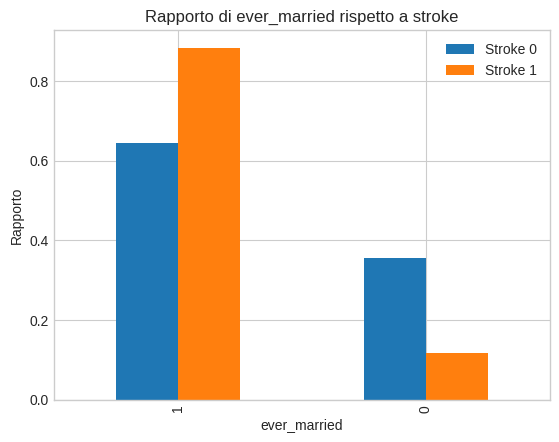

<Figure size 1000x600 with 0 Axes>

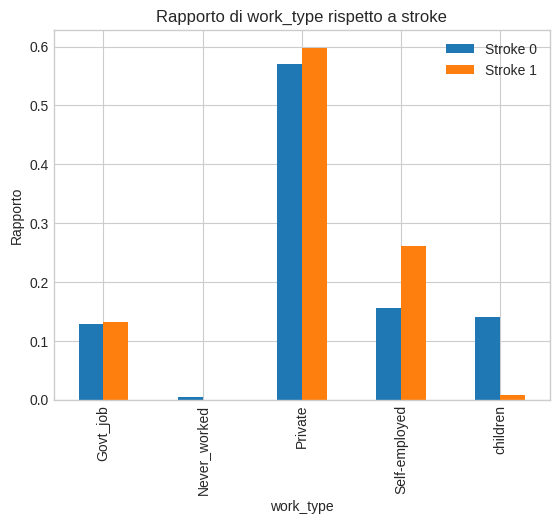

<Figure size 1000x600 with 0 Axes>

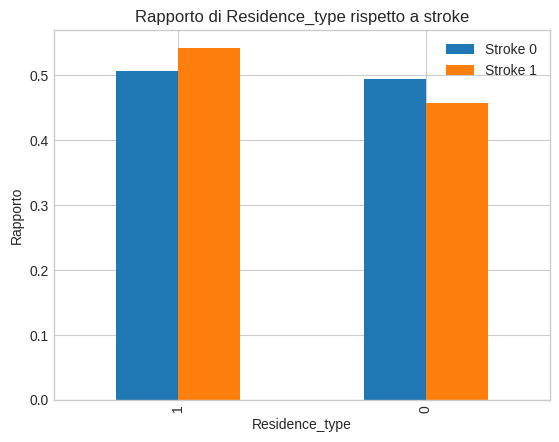

<Figure size 1000x600 with 0 Axes>

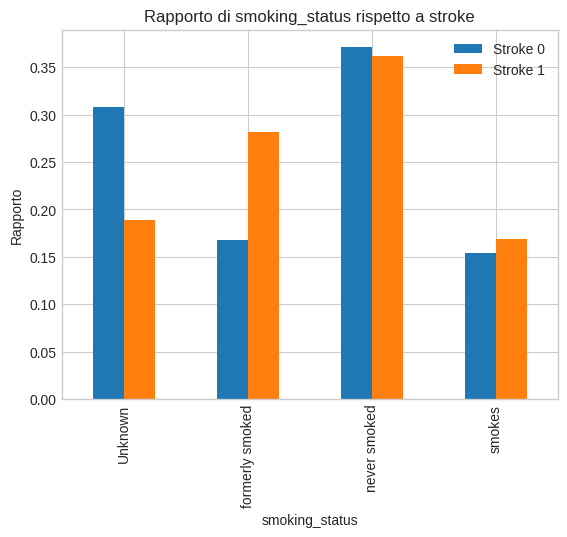

<Figure size 1000x600 with 0 Axes>

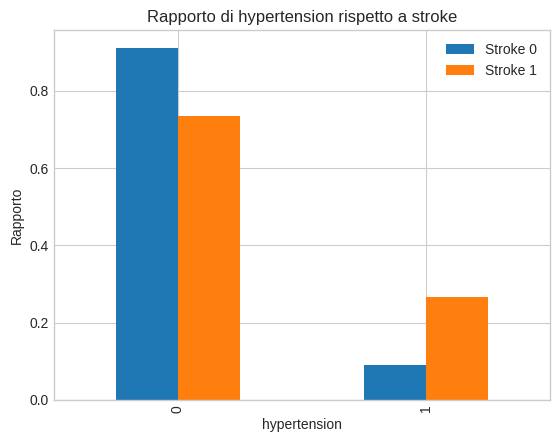

<Figure size 1000x600 with 0 Axes>

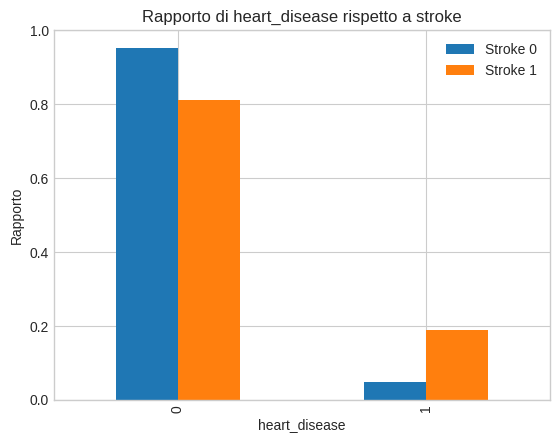

In [17]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))

    # Calcola il rapporto tra count di y con quella modalità sul totale di quelli con stroke=0
    counts_stroke_0 = df[df['stroke'] == 0][column].value_counts()
    total_stroke_0 = df[df['stroke'] == 0].shape[0]
    ratio_stroke_0 = counts_stroke_0 / total_stroke_0

    # Calcola il rapporto tra count di y con quella modalità sul totale di quelli con stroke=1
    counts_stroke_1 = df[df['stroke'] == 1][column].value_counts()
    total_stroke_1 = df[df['stroke'] == 1].shape[0]
    ratio_stroke_1 = counts_stroke_1 / total_stroke_1

    # Unisci i due dataframe
    ratio_df = pd.DataFrame({
        'Stroke 0': ratio_stroke_0,
        'Stroke 1': ratio_stroke_1
    })

    ratio_df.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
    plt.title(f'Rapporto di {column} rispetto a stroke')
    plt.ylabel('Rapporto')
    plt.xlabel(column)
    plt.show()

train and split


In [18]:
df_norm

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,1.051242,0,1,1,Private,1,2.706450,1.001041,formerly smoked,1
1,51676,1,0.785889,0,0,1,Self-employed,0,2.121652,-0.000165,never smoked,1
2,31112,0,1.626174,0,1,1,Private,0,-0.004867,0.468399,never smoked,1
3,60182,1,0.255182,0,0,1,Private,1,1.437473,0.715233,smokes,1
4,1665,1,1.581949,1,0,1,Self-employed,0,1.501297,-0.635858,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,1.626174,0,0,0,children,0,-0.494481,-0.000165,Unknown,0
5105,18234,1,1.670400,1,0,1,Private,1,0.420922,1.442744,never smoked,0
5106,44873,1,-0.363976,0,0,1,Self-employed,1,-0.511266,0.221565,never smoked,0
5107,19723,1,0.343633,0,0,1,Self-employed,0,1.328375,-0.427998,never smoked,0


In [19]:
df_norm.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
X = dataset.drop(['id', 'stroke'], axis = 1)
y = dataset['stroke']

In [21]:
def norm_X(X_total):
    # transform the dataframe in dictionary to perform feature extraction
    X_total = X_total.to_dict('records')

    v = DictVectorizer(sparse = False, dtype = float)
    X_total = v.fit_transform(X_total)
    return X_total, v

In [22]:
X_big_array = X.copy()
X_big_array, v = norm_X(X_big_array)

X_norm = pd.DataFrame(X_big_array, columns = v.get_feature_names_out())


oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X_big_array, y.array)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=100)

##Algorithm##

#k-neighbors method

In [24]:
knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [25]:
# Addestra il regressore sui dati di addestramento
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [26]:
# Fai predizioni sui dati di test
y_pred = knn_regressor.predict(X_test)


In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
# Converti y_pred a tipo intero
y_pred = y_pred.astype(int)


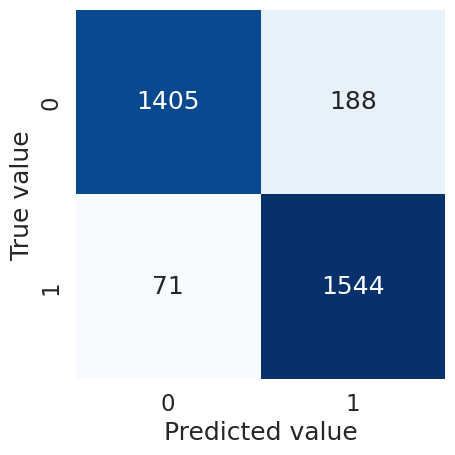

In [29]:
mat = confusion_matrix(y_test, y_pred)

sns.set(font_scale=1.5)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt="d", cmap="Blues")
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

##Support vector machine

In [34]:
# Crea il classificatore SVM
svm_classifier = SVC(kernel='linear', C=1.0)  # Puoi personalizzare il kernel e i parametri C a seconda delle tue esigenze

# Addestra il classificatore sui dati di addestramento
svm_classifier.fit(X_train, y_train)

# Fai predizioni sui dati di test
y_pred = svm_classifier.predict(X_test)


# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
mat = confusion_matrix(y_pred,y_test)



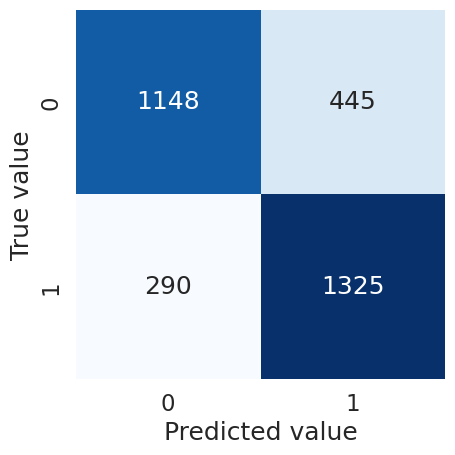

In [39]:
sns.set(font_scale=1.5)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt="d", cmap="Blues")
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

##Logistic Regretion

In [32]:
# Crea il classificatore Logistic Regression
clf = LogisticRegression(random_state=0)

# Addestra il classificatore sui dati di addestramento
clf.fit(X_train, y_train)

# Fai predizioni sui dati di test
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


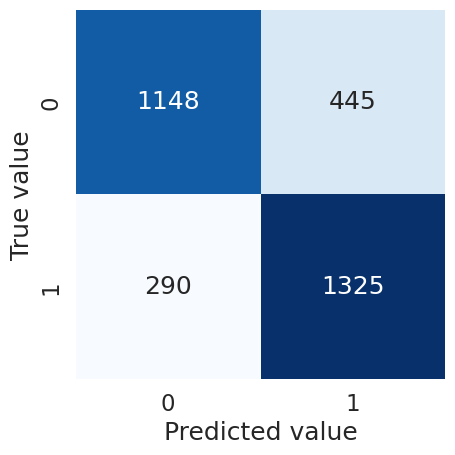

In [33]:
sns.set(font_scale=1.5)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt="d", cmap="Blues")
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

##Find the best K value for K-NN algorithm

In [43]:
def validation_curve_KN(X, y):
    skf = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

    train_results = []
    test_results = []

    k_values = list(range(1, 20, 2))

    for k in tqdm(k_values):
        train_score = []
        test_score = []

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train, y_train)

            train_pred = model.predict(X_train)
            train_score.append(accuracy_score(y_train, train_pred))

            y_pred = model.predict(X_test)
            test_score.append(accuracy_score(y_test, y_pred))

        train_results.append(np.mean(np.array(train_score)))
        test_results.append(np.mean(np.array(test_score)))

    return k_values, train_results, test_results

In [61]:
def plot_validation_curve(train_results, test_results, y_ax, name, xlable="n_neighbors"):
    fig, ax = plt.subplots(1,1, figsize=(15,10), facecolor="k")



    line1, = plt.plot(y_ax, train_results, 'o-', label='Train Accuracy', color="lightgray")
    line2, = plt.plot(y_ax, test_results, 'o-', label='Test Accuracy', color="gold")
    ax.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    ax.set_ylabel('accuracy', color="w", size=25, labelpad=10)
    ax.set_xlabel(xlable, color="w", size=25, labelpad=10)

    ax.spines['bottom'].set_color('w')
    ax.spines['left'].set_color('w')

    ax.tick_params(axis='x', colors='w')
    ax.tick_params(axis='y', colors='w')

    plt.xticks(size = 20)
    plt.yticks(size = 20)

    ax.grid(color="lightgray", alpha = 0.2)
    ax.legend(loc="lower right", facecolor="w")
    plt.savefig(name, bbox_inches='tight')

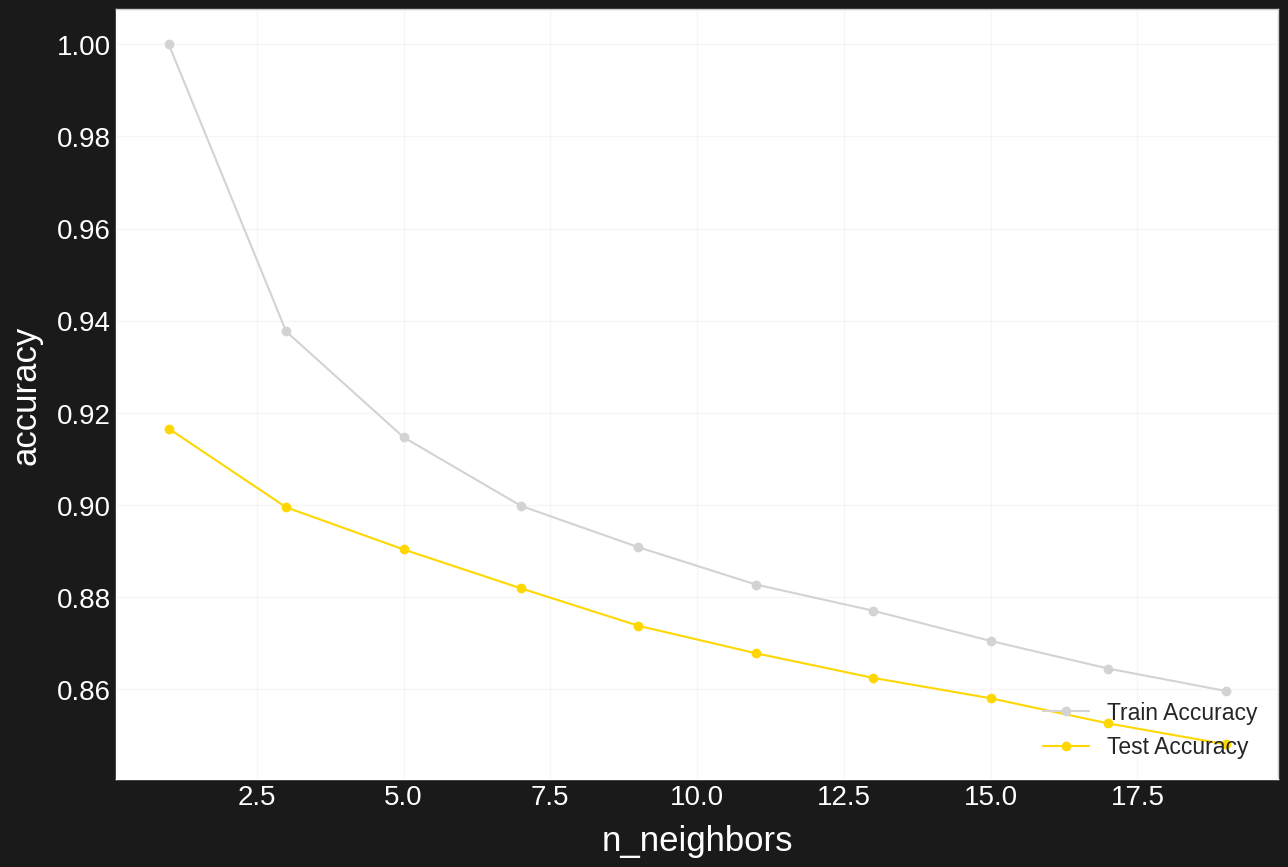

In [62]:
#k_values,train_results, test_results = validation_curve_KN(X_big_array, y.array)
plot_validation_curve(train_results, test_results, list(range(1,20,2)), "validation_curve_not_sampled.png")

100%|██████████| 10/10 [00:54<00:00,  5.45s/it]


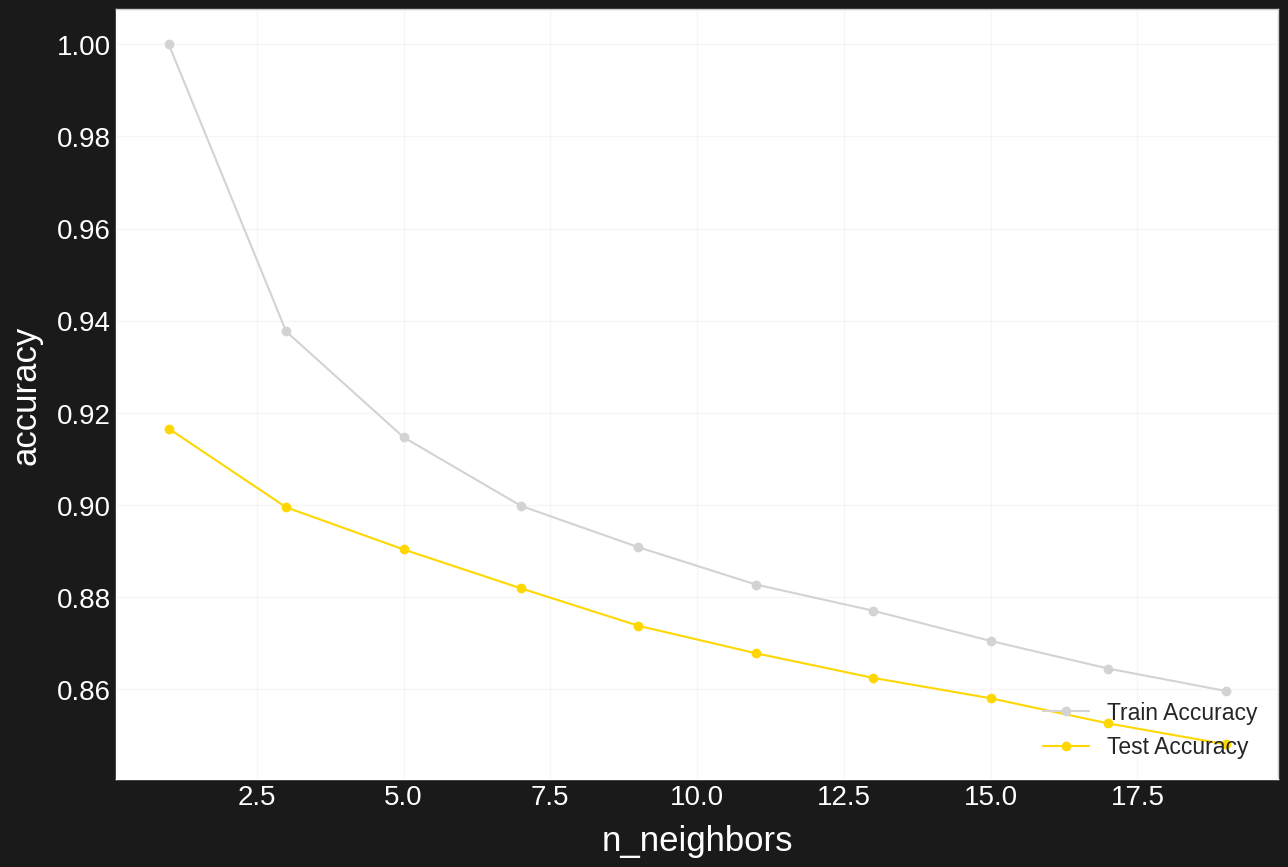

In [64]:
k_values,train_results, test_results = validation_curve_KN(X_res, y_res)
plot_validation_curve(train_results, test_results, list(range(1,20,2)), "validation_curve_sampled.png")